# PyTorch Computer Vision

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


# 1. Getting Data

The dataset used is the FashionMNIST dataset, similar to MNIST from `torchvision.datasets`

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download = True,
                                   transform = ToTensor(),
                                   target_transform = None)

test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform = ToTensor(),
                                  target_transform = None)



100%|██████████| 26421880/26421880 [00:01<00:00, 15842310.38it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 258593.97it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5058202.67it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15646577.53it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# Get class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# Get class names as dict
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# Check the shape of image
print(f"Image shape: {image.shape} -> [color, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color, height, width]
Image label: Ankle boot


## 1.2 Visualizating the data

Image shape: torch.Size([1, 28, 28])


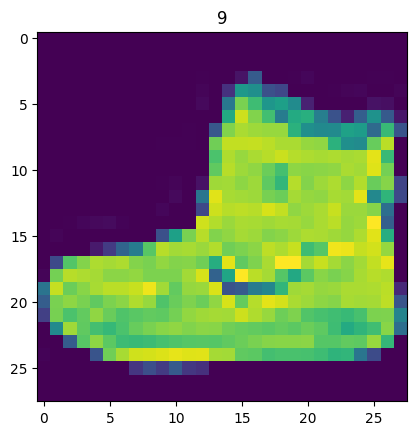

In [8]:
# Plot 1 image
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

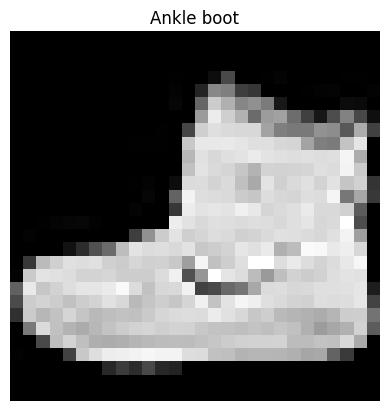

In [9]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

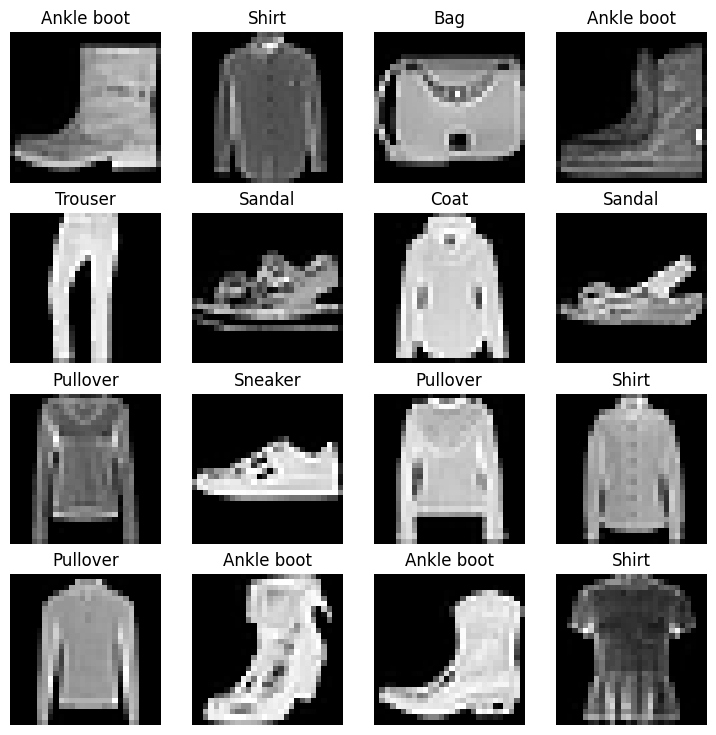

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)
plt.show()

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Data Loader

Data is in the form PyTorch Datasets and needs to turn int a PyTorch iterable. This can be done with the `DataLoader`

In [12]:
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE = 32

# Turn dataset in iterables
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c93c75c68f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c93c75c7520>)

In [13]:
# let's check out what wascreated
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# 60000/32 ~ 1875 batches of 32 images

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c93c75c68f0>, <torch.utils.data.dataloader.DataLoader object at 0x7c93c75c7520>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [14]:
# Check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # note only 32 images in this batch hence the iter to get the next batch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

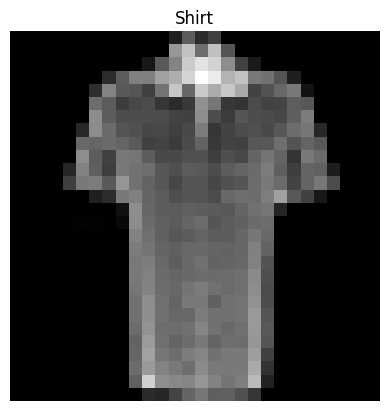

Image size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


In [15]:
# Show sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()
print(f"Image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

## 3. Build a model

In [16]:
# Model 0
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input: int, hidden_units: int, output: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [17]:
# Figure out dimensions with flatten
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.shape


torch.Size([1, 784])

In [18]:
# Setup model 0 parameters
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input = 784, # 28 * 28 -> from flatten
                              hidden_units = 10,
                              output = len(class_names))
model_0.to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Loss function and optimizer
* Loss - `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()`
* Accuracy - `torchmetrics.accuracy`

In [19]:
# See if required packages are installed and if not,install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__verison__}")
  assert int(mlxtend.__version__.split("."[1]) >= 19, "mlxtend version should be 0.19.0 or higher")

except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 8.7 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [20]:
from torchmetrics.classification import MulticlassAccuracy

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

## 3.2 Creating a timer

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """
    Prints difference between start and end time
  """

  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

## 3.3 Training and testing loop

In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch} \n ----------")

  ### Training
  train_loss = 0 # per batch

  # Loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Loss
    loss = loss_fn(y_pred,y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what is happeneing
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X) / len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calcualte the loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. Accuracy
      metric = MulticlassAccuracy(num_classes=len(class_names))
      test_acc += metric(test_pred.argmax(dim=1), y_test)

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what is happeneing
  print(f"\n Train Loss: {train_loss: .4f} | Test loss: {test_loss: .4f} | Test Acc: {test_acc: .4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0 
 ----------
Looked at 0.0 samples
Looked at 0.21333333333333335 samples
Looked at 0.4266666666666667 samples
Looked at 0.64 samples
Looked at 0.8533333333333334 samples

 Train Loss:  0.5904 | Test loss:  0.5095 | Test Acc:  0.8116
Epochs: 1 
 ----------
Looked at 0.0 samples
Looked at 0.21333333333333335 samples
Looked at 0.4266666666666667 samples
Looked at 0.64 samples
Looked at 0.8533333333333334 samples

 Train Loss:  0.4763 | Test loss:  0.4799 | Test Acc:  0.8219
Epochs: 2 
 ----------
Looked at 0.0 samples
Looked at 0.21333333333333335 samples
Looked at 0.4266666666666667 samples
Looked at 0.64 samples
Looked at 0.8533333333333334 samples

 Train Loss:  0.4550 | Test loss:  0.4766 | Test Acc:  0.8233
Train time on cpu:  29.083 seconds


## 4. Make predictions and get Model_0 results

In [23]:
str(next(model_0.parameters()).device)

'cpu'

In [24]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy):
  """
    Returns a dictory containing the results of model predicting on data_loader
  """

  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    # Make predictions
    for X,y in tqdm(data_loader):
      y_pred = model(X)

      # Accumluate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy(y_pred.argmax(dim=1),y)

    # Scale loss to find the average loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
         "model_loss": loss.item(),
         "model_acc": acc.item()}


In [25]:
# Calculate model_0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy = metric)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8233307003974915}

## 5. Setup device agnoistic-code (for using a GPU if there is one)

In [26]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1. Building a better model with non-linearity

In [28]:
# Create a model with non-linear and linear layers
class FashionMNISTMOdelV1(nn.Module):
  def __init__(self, input: int, hidden_units: int, output: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output),
        nn.ReLU(),
    )

  def forward(self,x):
    return self.layer_stack(x)

In [29]:
# Create an instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTMOdelV1(input = 28*28,
                              hidden_units = 10,
                              output = len(class_names)).to(device)

next(model_1.parameters()).device, model_1.state_dict()

(device(type='cpu'),
 OrderedDict([('layer_stack.1.weight',
               tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                       [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                       [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                       ...,
                       [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                       [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                       [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
              ('layer_stack.1.bias',
               tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                        0.0018,  0.0163])),
              ('layer_stack.3.weight',
               tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                         0.2019,  0.2847],
                       [-0.1495,  0.1344, -0.

### 6.1 Loss, optimization, and evaluation metrics

In [30]:
from torchmetrics.classification import MulticlassAccuracy

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

# Accuracy
accuracy = MulticlassAccuracy(num_classes = len(class_names)) #(preds, target)

## 6.2 Functionizing training and evaluation/testing loops

Creating a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [52]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """
  Performs a training loop with model trying to learn on data_loader
  """
  train_loss, train_acc = 0,0

  # Put model in training mode
  model.train()

  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(data_loader):

    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred.argmax(dim=1),y)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and train accuracy by length of train_dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss: .5f} | Train acc: {train_acc*100: .2f}%")


In [53]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  """
    Performs a testing loop step on model going over data_loader
  """

  test_loss, test_acc = 0,0

  # Put the model in eval mode
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:

      # Send data to device
      X,y = X.to(device), y.to(device)

      # 1.Forward
      test_pred = model(X)

      # 2. Loss
      test_loss += loss_fn(test_pred,y)

      # 3. Accuracy
      test_acc += accuracy_fn(test_pred.argmax(dim=1),y)

    # Adjust metrics: Loss and Accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  # Print out what's happening
  print(f"Test loss: {test_loss: .5f} | Test Acc: {test_acc*100: .2f}% \n")


In [33]:
# Perform training and testing loop for model 1
torch.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_on_gpu = timer()

# Epochs
epochs = 3

# Create optimization and evaluation loop using train and test step
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n--------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy,
             device = device)
  test_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy,
             device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
--------
Train loss:  1.09199 | Train acc:  0.60%
Test loss:  0.92727 | Test Acc:  0.65% 

Epoch: 1 
--------
Train loss:  0.73779 | Train acc:  0.73%
Test loss:  0.68793 | Test Acc:  0.74% 

Epoch: 2 
--------
Train loss:  0.66776 | Train acc:  0.75%
Test loss:  0.64329 | Test Acc:  0.76% 

Train time on cpu:  45.811 seconds


In [60]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy = metric)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMOdelV1',
 'model_loss': 0.6874349117279053,
 'model_acc': 0.7430804967880249}

## 7. Build a Convolutional Neural Network (CNN)

In [54]:
# Create a convolutional neural network
import torch
from torch import nn

class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    """
    Model architecutre that replicates the Tiny VGG model from CNN explainer webiste
    """

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = output_shape,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1), # values we can set outselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 2,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,  # trick to calculating this (hidden_units = )
                  out_features = output_shape),
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv black 1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv black 2: {x.shape}")
    x = self.classifier(x)
    return x

In [55]:
# Create an instance of model 2
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, # only 1 color channel
                              hidden_units = 10,
                              output_shape= len(class_names)).to(device)

### 7.1 Loss and optimizer for model 2

In [56]:
from torchmetrics.classification import MulticlassAccuracy

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

# Accuracy
accuracy = MulticlassAccuracy(num_classes = len(class_names)) #(preds, target)

## 7.2 Training and testing loops

In [57]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n --------" )
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy,
             device = device)

  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy,
            device = device)


train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
 --------
Train loss:  1.48184 | Train acc:  45.70%
Test loss:  0.61983 | Test Acc:  76.79% 

Epoch: 1
 --------
Train loss:  0.53310 | Train acc:  79.64%
Test loss:  0.48394 | Test Acc:  81.83% 

Epoch: 2
 --------
Train loss:  0.44148 | Train acc:  83.08%
Test loss:  0.43141 | Test Acc:  83.85% 

Epoch: 3
 --------
Train loss:  0.39735 | Train acc:  84.75%
Test loss:  0.39485 | Test Acc:  85.17% 

Epoch: 4
 --------
Train loss:  0.36951 | Train acc:  85.87%
Test loss:  0.37565 | Test Acc:  86.32% 

Epoch: 5
 --------
Train loss:  0.35101 | Train acc:  86.90%
Test loss:  0.36482 | Test Acc:  86.77% 

Epoch: 6
 --------
Train loss:  0.33745 | Train acc:  87.00%
Test loss:  0.36514 | Test Acc:  86.70% 

Epoch: 7
 --------
Train loss:  0.32874 | Train acc:  87.50%
Test loss:  0.34617 | Test Acc:  87.11% 

Epoch: 8
 --------
Train loss:  0.31977 | Train acc:  87.83%
Test loss:  0.35358 | Test Acc:  87.07% 

Epoch: 9
 --------
Train loss:  0.31361 | Train acc:  88.01%
Test loss:  

In [58]:
# Get model_2 results dictionary
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy = accuracy)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3501129746437073,
 'model_acc': 0.8655266761779785}

## 8. Compare models

In [61]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,0.823331
1,FashionMNISTMOdelV1,0.687435,0.743080
2,FashionMNISTModelV2,0.350113,0.865527


In [64]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results["epochs"] = [3,3,10]

compare_results

,model_name,model_loss,model_acc,training_time,epochs
0,FashionMNISTModelV0,0.476639,0.823331,29.083266,3
1,FashionMNISTMOdelV1,0.687435,0.743080,45.811098,3
2,FashionMNISTModelV2,0.350113,0.865527,296.788079,10


Text(0, 0.5, 'model')

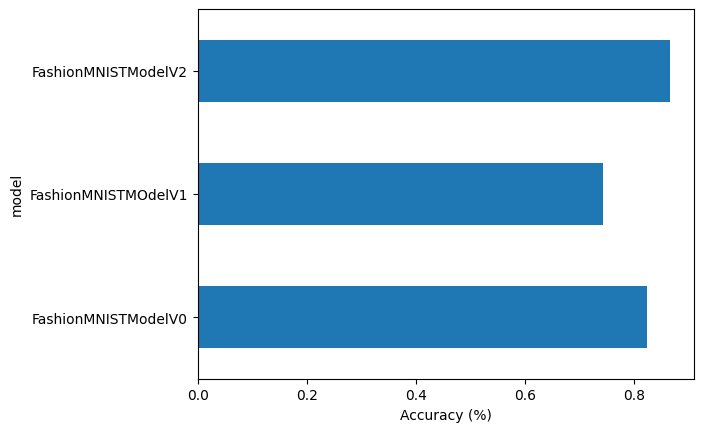

In [65]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [66]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logits = model(sample)

      # Get prediction probabilities (logits -> prediction probabilties)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred probs off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [67]:
# 10 samples
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [69]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

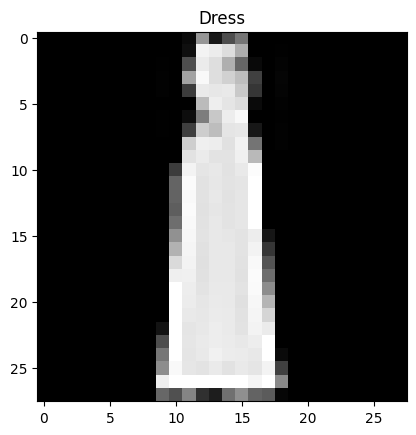

In [70]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])
plt.show()

In [71]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[5.5893e-04, 1.9532e-03, 3.0182e-04, 9.8623e-01, 6.2241e-03, 6.9804e-06,
         4.4176e-04, 6.8848e-05, 3.7953e-03, 4.1721e-04],
        [4.0492e-03, 2.7126e-04, 5.2292e-02, 5.3403e-02, 3.9486e-02, 2.1567e-05,
         8.4598e-01, 1.0834e-05, 4.1459e-03, 3.4221e-04]])

In [72]:
test_labels

[3, 6, 5, 1, 9, 6, 4, 9, 0]

In [73]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 6, 5, 1, 9, 6, 4, 9, 0])

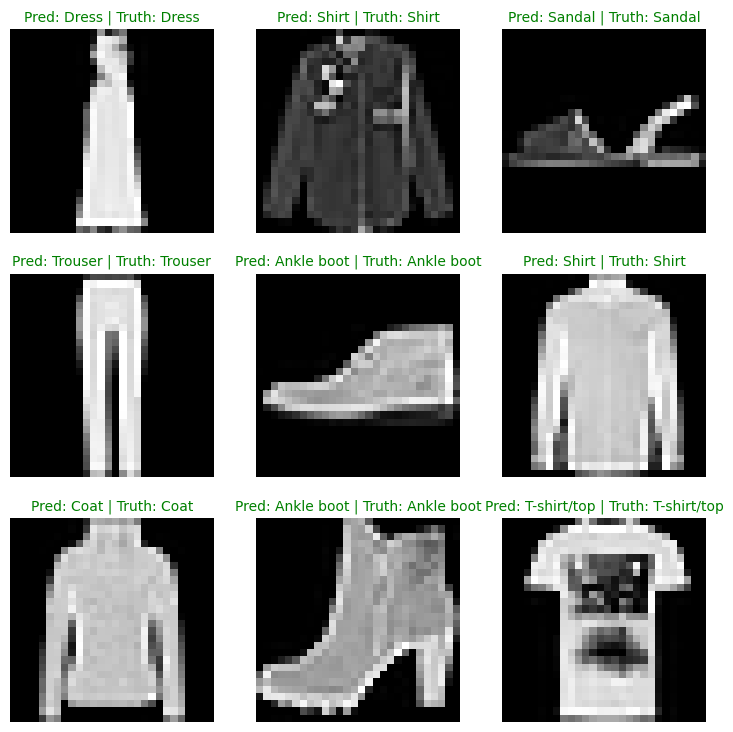

In [74]:
# Plot predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols, i+1)

  # Plot target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # Find the prediction in text form
  pred_label = class_names[pred_classes[i]]

  # Get the truth label in text form
  truth_label = class_names[test_labels[i]]

  # Title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Create for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize = 10, c="r")

  plt.axis(False)

## 10. Make a confusion matrix for further prediction evaluation

In [75]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making predictions..."):
    # Send the data and targets to device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits > prediction probabilititres
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatentage list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [76]:
len(y_pred_tensor)

10000

In [77]:
# See if required packages are installed and if not,install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__verison__}")
  assert int(mlxtend.__version__.split("."[1]) >= 19, "mlxtend version should be 0.19.0 or higher")

except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [78]:
import mlxtend
print(mlxtend.__version__)

0.22.0


In [79]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task = "MULTICLASS", num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

In [80]:
confmat_tensor

tensor([[540,   8,  35, 125,   6,   1, 270,   0,  15,   0],
        [ 13, 699,   4, 239,  33,   0,   9,   1,   2,   0],
        [ 15,   8, 730,  29, 110,   0,  90,   0,  18,   0],
        [ 30,  11,  16, 884,  22,   0,  27,   0,  10,   0],
        [ 13,   5, 125,  77, 649,   0, 111,   1,  19,   0],
        [  6,   0,   0,  28,   1, 778,  13,  85,  69,  20],
        [ 73,   5, 113,  97,  94,   0, 597,   0,  21,   0],
        [  2,   0,   0,   5,   0,  50,   0, 865,  23,  55],
        [ 11,   3,  13,  20,  12,   5,  22,   6, 907,   1],
        [  2,   0,   0,   3,   1,  54,   1, 110,  39, 790]])

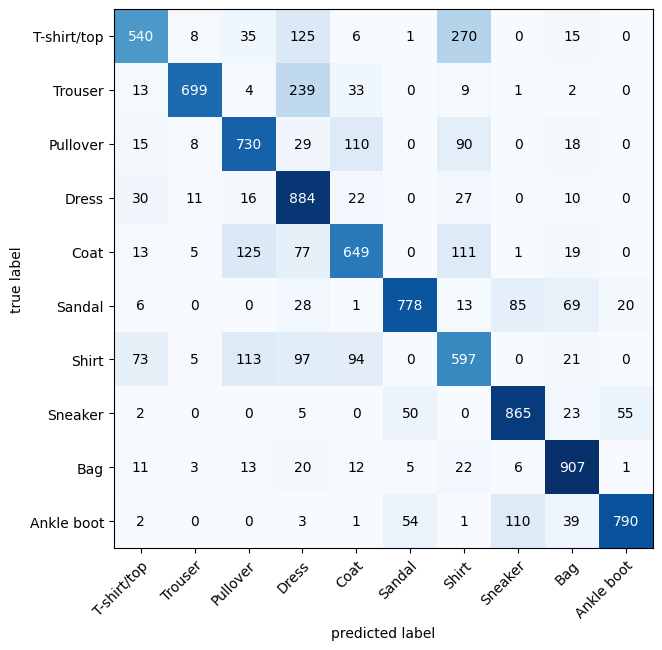

In [81]:
# 3. Plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize = (10,7)
)


## 11. Save and load best performing model

In [82]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save
MODEL_NAME = "pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to : models/pytorch_computer_vision_model_2.pth


In [83]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Load in the save state dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [86]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy = accuracy
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3501129746437073,
 'model_acc': 0.8655266761779785}

In [87]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3501129746437073,
 'model_acc': 0.8655266761779785}

In [88]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-02)

tensor(True)